# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # импортируем необходимые для проекта библиотеки 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # читаем csv-файл

**Выведем первые 20 строчек датафрейма `data` на экран.**

In [3]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим общую гистограмму для всех числовых столбцов таблицы.**

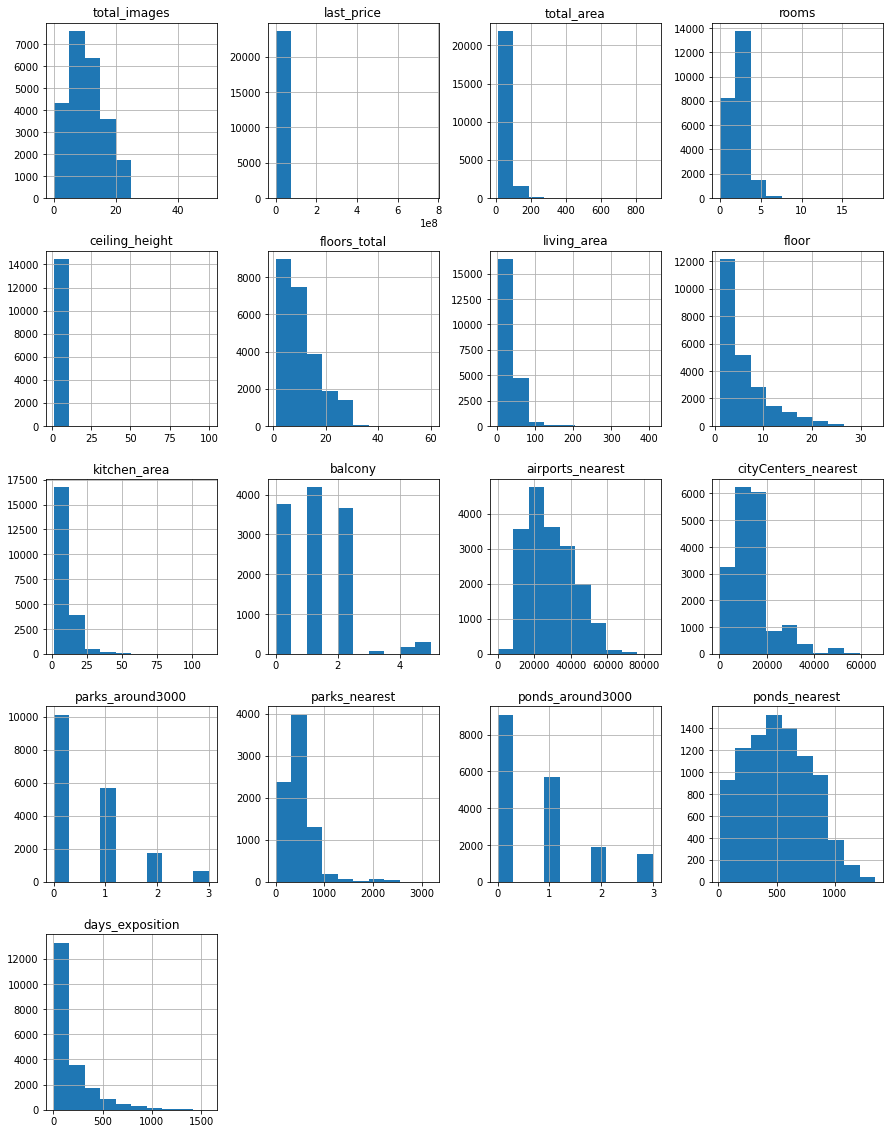

In [5]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца.**

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

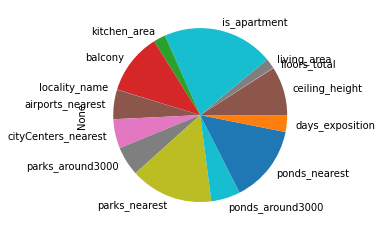

In [6]:
display(data.isna().sum())
data.isna().sum().plot(kind='pie')
plt.show()

**Пропуски есть в столбцах:**
- Удаленность от парков   
- Удаленность от прудов
- Удаленность от аэропорта
- Удаленность от центра города
- Длительность размещения объявления
- Площадь кухни
- Количество этажей в здании
- Название населенного пункта

**в данных большое количество пропусков, не во всех столбцах получится обработать пропуски. Но так же есть столбцы с пропусками, которые не сильно повлияют на исследование.**

In [7]:
#Начнем по порядку, первый столбец с пропущенными значениями - высота потолков.Точных данных для замены мы не сможем
#найти, поэтому предлагаю пропуски заменить медианным значением
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

#Столбец с Количеством этажей так же логически заменить нельзя, да и количество пропущенных значений не велико, 
#поэтому этот столбец оставим как есть.

#Следующий столбец с пропущенными значениями - жилая площадь. Пропусков не мало, предлагаю их заменить медианным значением, 
#по количеству комнат
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()

#Далее столбец с аппартаментами, огромное количество пропусков, думаю их логично заменить на False, так как скорее всего 
#владельцы обычных квартир просто оставляли этот пункт не заполненным
data['is_apartment']=data['is_apartment'].fillna(False)

#Следующий столбец - площадь кухни. Часть пропущенных значений относится к аппартаментам, студиям и открытым планировкам. 
#Можно заменить значения на средние или медианные, но на общую картину это не повлияет, поэтому оставим этот столбец без изменений.

#Следующий столбец - балконы, тут так же логично предположить, что если пропуск, то балкон отсутствует, 
#поэтому заменяем пропуски на 0:
data['balcony']=data['balcony'].fillna(0)

#Столбцы с названием населенного пункта, удаленности от центра города и аэропорта оставляем без изменений, 
#логически мы их заполнитиь не можем

#Столбцы с количеством парков и прудов - так же пропуски заменим на 0, логично предположить, что если их количество не указано, 
#то и парков с прудами по близости нет. 
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

data[data['days_exposition'].isna()] #В столбце с количеством дней размещения большинство строк с более поздними датами
#первого размещения, отсюда можем предположить, что эти обьекты еще не проданы, этот столбец также оставим без изменений.

    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.5,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,17.6,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


**Выведем еще раз количество пропущенных значений для каждого столбца.**

In [8]:
display(data.isna().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**От всех пропусков избавиться нам не удалось, но в большинстве важных для исследования данных мы от них избавились. Причины появления пропусков на мой взгляд две:**
- В данных которые добавляют пользователи (площади, балконы, количество этажей), сами пользователи пропускают эти значения не считая их важными.
- В картографических данных скорее всего проблема в программе, которая определяет эти данные

**Пропуски в столбце days_exposition на мой взгляд связаны с тем, что объект на момент выгрузки данных был еще в продаже**

#### Изменение типов данных

In [9]:
data.info() #Посмотрим еще раз типы данных, после удаления пропусков столбец is_apartment поменял тип данных на bool.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
# Изменим тип данных в стобце last_price на int64, для удобства при просмотре, относительно цены, значения после запятой не
# имеют значения
data['last_price'] = data['last_price'].astype('int')

# Столбец first_day_exposition приведем к формату datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

# Столбец floors_total нужно поменять на int64, количество этажей не может быть вещественным числом, но мы не можем этого
# сделать, пока у нас в этом столбце пропуски, оставим как есть.

# Столбец balcony нужно поменять на int64, количество балконов не может быть вещественным числом
data['balcony'] = data['balcony'].astype('int')

# Столбцы с каоличеством парков и прудов также меняем на int64
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')

# Столбец days_exposition нужно поменять на int64, количество этажей не может быть вещественным числом, но мы не можем этого
# сделать, пока у нас в этом столбце пропуски, оставим как есть. 


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Pandas автоматически выбирает тип данных, но иногда он ошибается, в таких случаях необходимо менять тип данных. Данные даты и времени мы меняем на тип datetame, для возможности применения арифметических операций.** 

#### Обработка дубликатов

In [12]:
#Найдем список уникальных значений для столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Первое что бросается в глаза - буква е и ё в одних и тех же названиях и типы поселений - для одного названия используются разные типы**

In [13]:
#Заменим все ё на е
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)

#Также избавимся от типов поселений, так как они повторяются с использованием типа и без него
word_list = ['поселок ', 'городской поселок ', 'городской ', 'городского типа ', 'при железнодорожной станции ', 'станции ', 'коттеджный', 'садоводческое некоммерческое товарищество ', 'поселок городского типа ', 'деревня ', 'садовое товарищество ', 'село ', 'садовое некоммерческое товарищество ','коттеджный поселок ']
name = ''
for word in word_list:
    data['locality_name'] = data['locality_name'].replace(word, name, regex=True)

In [14]:
#И снова выведем список уникальных значений
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Поиск редких и выбивающихся значений

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

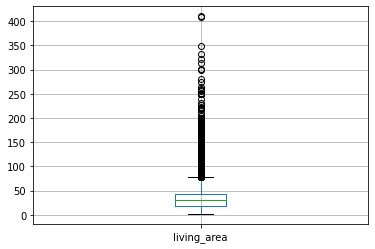

In [15]:
#Построим диаграмму размаха и воспользуемся методом describe() для столбца total_area. По диаграмме видно что есть выбросы.
#Предлагаю отфильтровать варианты свыше 200м2, это больше "усов", но так мы отбросим только 1% данных.
display(data['total_area'].describe())
data.boxplot('living_area')
data_filtred = data[data['total_area']<200]

#К редким и выбивающимся значениям я бы отнес объекты с жилой площадью больше общей площади, таких объектов 29 штук.
#уберем эти объекты из данных.
data_filtred = data_filtred[data_filtred['living_area']<data_filtred['total_area']]

#Высота потолков больше 20 метров. Значения высоты больше 20 метров скорее всего ошибочно записаны.
#Для таких объектов уменьшим высоту в 10 раз.
for height in data_filtred['ceiling_height']:
    if height >= 20:
        data_filtred['ceiling_height'] = data_filtred['ceiling_height'].replace({height: height/10})
       
    

**На мой взгляд редкими и выбивающимися значениями в ДФ являютсяя:**
- Большие площади (общие, жилые, площади кухни), мы отбросили объекты общей площадью свыше 200м2, потеряв при этом лишь 1% данных.
- Объекты с жилой площадью больше общей площади, тут скорее всего ошибка при вводе данных, мы от них избавились ввиду малого количества.
- Объекты с высотой потолков больше 20 метров. Значения с высотой больше 20 мы заменили значениями: высота/10, скорее всего это ошибка при вводе данных.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим в таблицу:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [16]:
#Добавим в таблицу цену 1м2 и переведем в целочисленные значения, для удобства просмотра
data_filtred['square_meter_price'] = data_filtred['last_price']/data_filtred['total_area']
data_filtred['square_meter_price'] = data_filtred['square_meter_price'].astype(int)

#Добавим день недели публикации
data_filtred['weekday_exposition'] = data_filtred['first_day_exposition'].dt.weekday

#Добавим месяц публикации
data_filtred['month_exposition'] = data_filtred['first_day_exposition'].dt.month

#Добавим год публикации
data_filtred['year_exposition'] = data_filtred['first_day_exposition'].dt.year

#Добавим тип этажа квартиры. Создадим функцию floor_type.
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data_filtred['floor_type'] = data_filtred.apply(floor_type, axis = 1)

#Добавим расстояние до центра города в километрах и округлим до целых значений методом round(). Поменять тип на 'int' мы не 
#можем из-за наличия пропусков

data_filtred['cityCenters_nearest_km'] = data_filtred['cityCenters_nearest'] / 1000
data_filtred['cityCenters_nearest_km'] = data_filtred['cityCenters_nearest_km'].round()


### Проведите исследовательский анализ данных

#### Изучим параметры объектов:

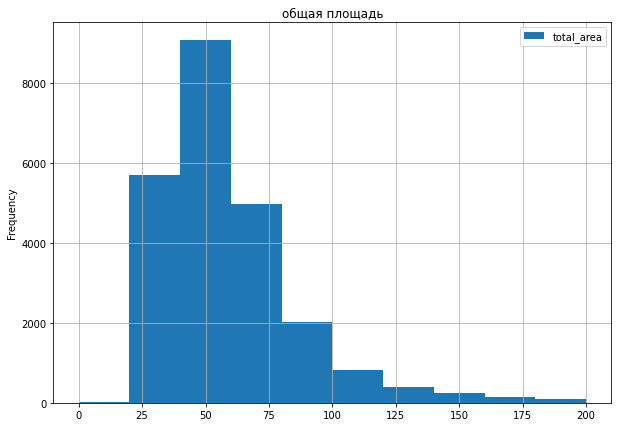

In [17]:
#Построим гистограмму общей площади
data_filtred.plot(kind='hist', y='total_area', figsize=(10,7), range=(0,200), grid=True, bins=10)
plt.title('общая площадь')
plt.show()

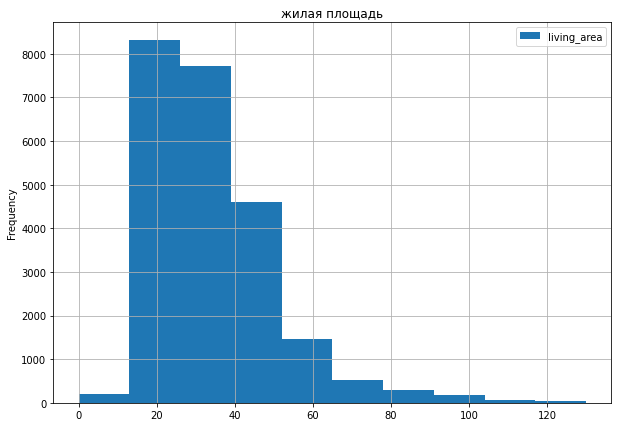

In [18]:
#Построим гистограмму жилой площади
data_filtred.plot(kind='hist', y='living_area', figsize=(10,7), range=(0,130), grid=True, bins=10)
plt.title('жилая площадь')
plt.show()

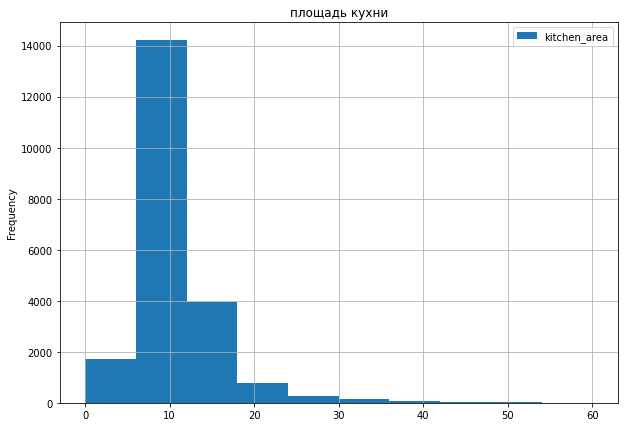

In [19]:
#Построим гистограмму площади кухни
data_filtred.plot(kind='hist', y='kitchen_area', figsize=(10,7), range=(0,60), grid=True, bins=10)
plt.title('площадь кухни')
plt.show()

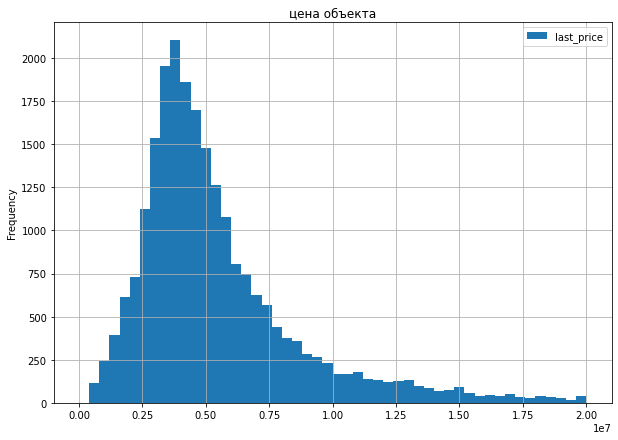

In [20]:
#Построим гистограмму цены объекта
data_filtred.plot(kind='hist', y='last_price', figsize=(10,7), range=(0,20000000), grid=True, bins=50)
plt.title('цена объекта')
plt.show()

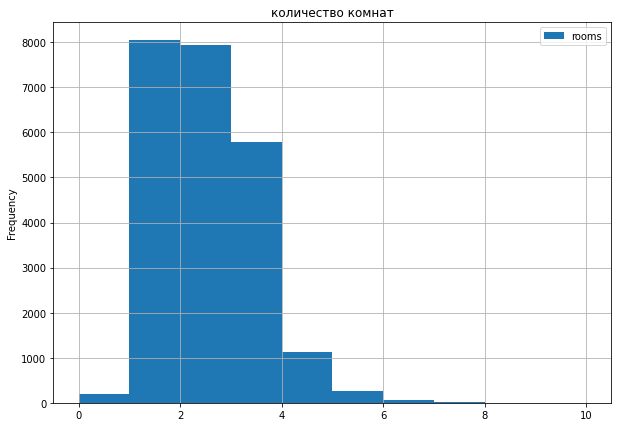

In [21]:
#Построим гистограмму количества комнат
data_filtred.plot(kind='hist', y='rooms', figsize=(10,7), range=(0,10), grid=True, bins=10)
plt.title('количество комнат')
plt.show()

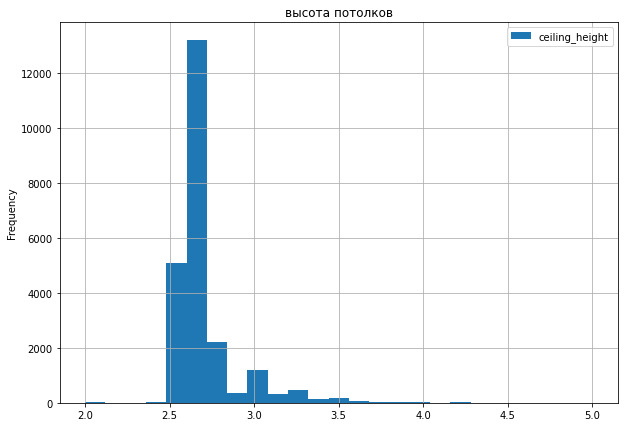

In [22]:
#Построим гистограмму высоты потолков
data_filtred.plot(kind='hist', y='ceiling_height', figsize=(10,7), range=(2,5), grid=True, bins=25)
plt.title('высота потолков')
plt.show()

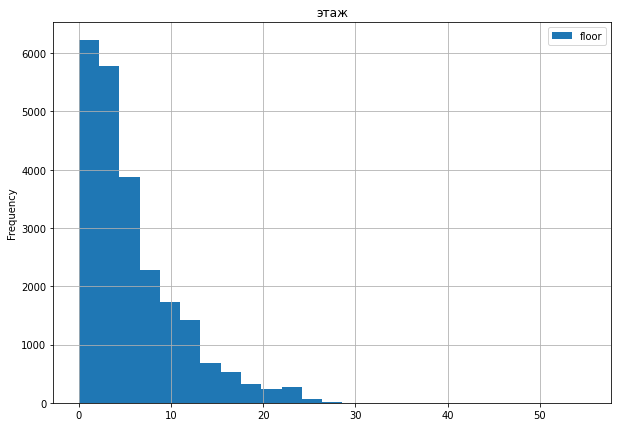

In [23]:
#Построим гистограмму этажа квартиры
data_filtred.plot(kind='hist', y='floor', figsize=(10,7), range=(0,55), grid=True, bins=25)
plt.title('этаж')
plt.show()

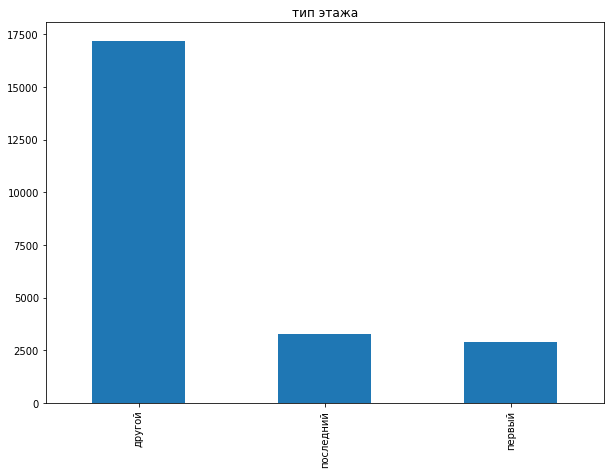

In [24]:
#Построим гистограмму типа этажа квартиры
data_filtred['floor_type'].value_counts().plot(kind='bar', figsize=(10,7))
plt.title('тип этажа')
plt.show()

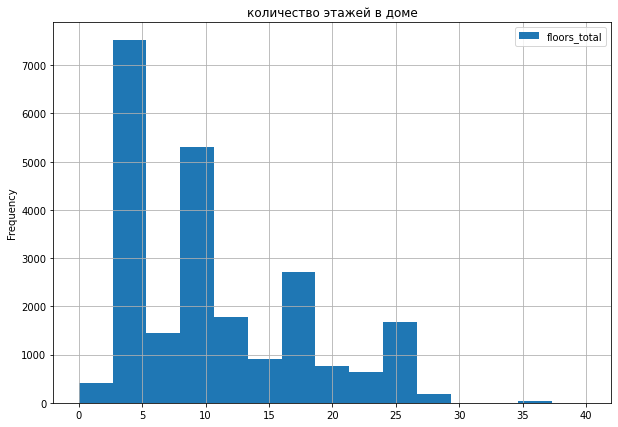

In [25]:
#Построим гистограмму количества этажей в доме
data_filtred.plot(kind='hist', y='floors_total', figsize=(10,7), range=(0,40), grid=True, bins=15)
plt.title('количество этажей в доме')
plt.show()

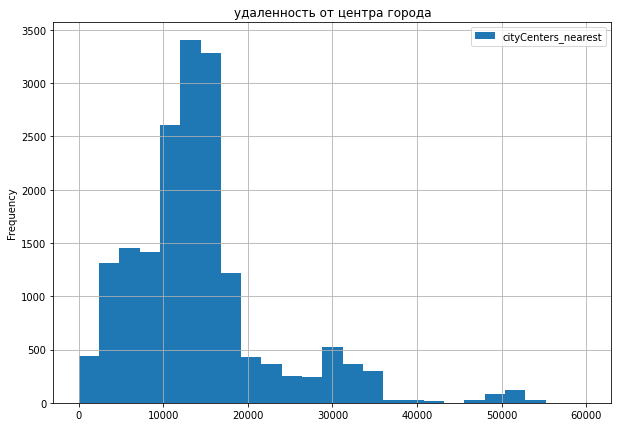

In [26]:
#Построим гистограмму расстояния до центра города в метрах
data_filtred.plot(kind='hist', y='cityCenters_nearest', figsize=(10,7), range=(0,60000), grid=True, bins=25)
plt.title('удаленность от центра города')
plt.show()

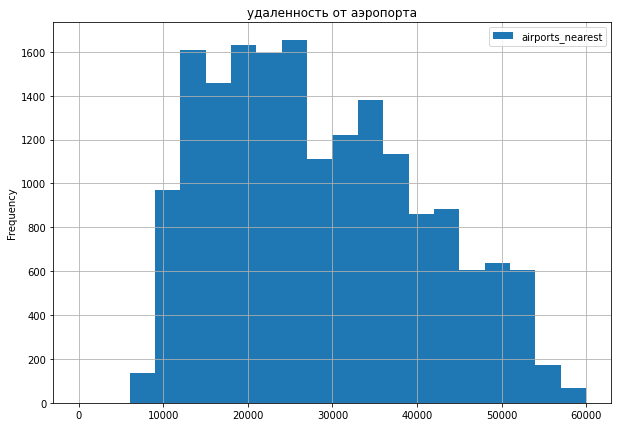

In [27]:
#Построим гистограмму расстояния до ближайшего аэропорта в метрах
data_filtred.plot(kind='hist', y='airports_nearest', figsize=(10,7), range=(0,60000), grid=True, bins=20)
plt.title('удаленность от аэропорта')
plt.show()

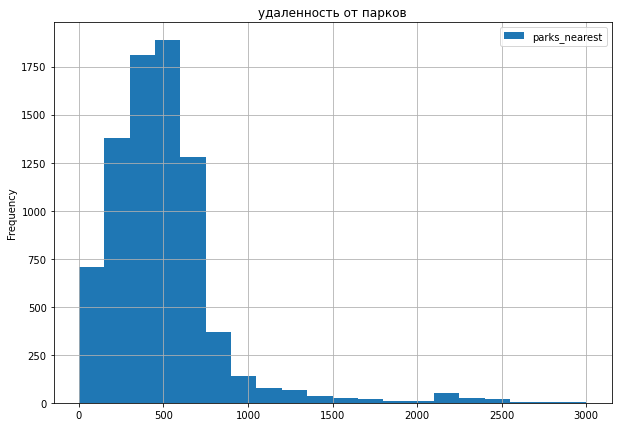

In [28]:
#Построим гистограмму расстояния до ближайшего парка в метрах
data_filtred.plot(kind='hist', y='parks_nearest', figsize=(10,7), range=(0,3000), grid=True, bins=20)
plt.title('удаленность от парков')
plt.show()

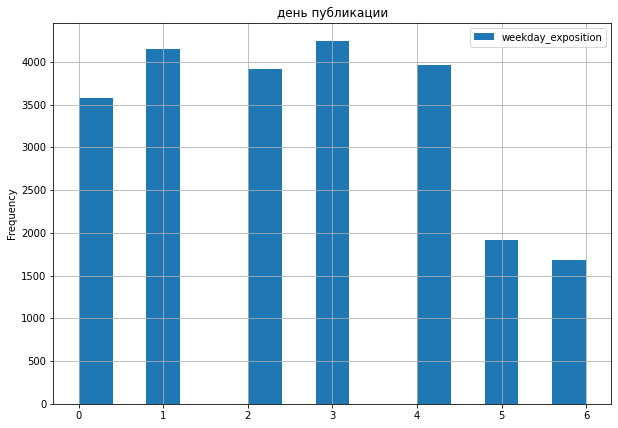

In [29]:
#Построим гистограмму дня публикации
data_filtred.plot(kind='hist', y='weekday_exposition', figsize=(10,7), range=(0,6), grid=True, bins=15)
plt.title('день публикации')
plt.show()

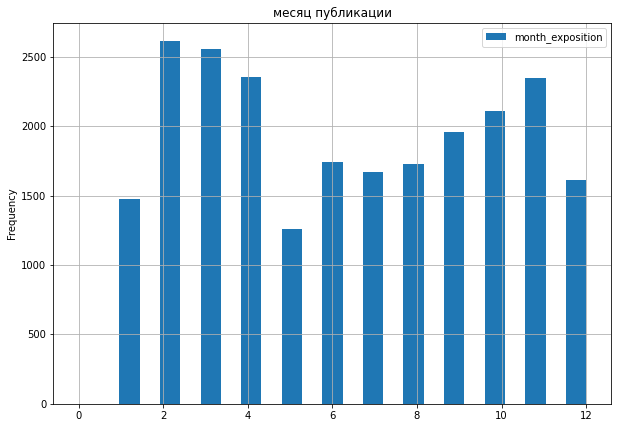

In [30]:
#Построим гистограмму месяца публикации
data_filtred.plot(kind='hist', y='month_exposition', figsize=(10,7), range=(0,12), grid=True, bins=25)
plt.title('месяц публикации')
plt.show()

**Наблюдения по построенным гистограммам:**
- общая площадь у большинства продающихся объектов колеблется от ~20м2 до ~80м2. Большее количество объектов с площадью около 50м2.
- жилая площадь в большинстве случаев в пределах от ~17м2 до ~ 40м2, чуть меньше объектов с жилой площадью 40-60м2.
- площадь кухонь находится в интервале от ~6м2 до ~12м2
- цена на момент снятия с продажи с пиком около 4.5 млн., большая часть объектов продавались за 2.7 - 6.5 млн.
- количество комнат в интервале 1-3 комнаты
- высота потолков от 2.5м до 2.7
- этажи продаваемых объектов в большинстве меньше 10, тут логично предположить что продаются чаще квартиры в домах старой постройки, для которых типичные значения 5 и 9 этажей.
- большая часть объявлений с этажем отличным от первого и последнего.
- этажность домов у продаваемых объектов подтверждает наше предыдущее заключение, пики гистограммы в области 5 и 9 этажей.
- удаленность от центра в среднем от 10 до 17 км.
- удаленность от аэропорта от 10км. и плавно спадающая к 50 км.
- удаленность от парков около 500м.
- день недели для размещения обьявления чаще будний, в выходные активность в 2 раза ниже.
- размещают объявленияя чаще в весенне - осенний период, со спадами в декабре-январе (скорее всего связано с подготовкой к празднованию нового года и отъездом на новогодние праздники) и в мае-августе (в периоды летних отпусков).


#### Изучим как быстро продавались квартиры:

count    20309.000000
mean       179.833079
std        218.407145
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

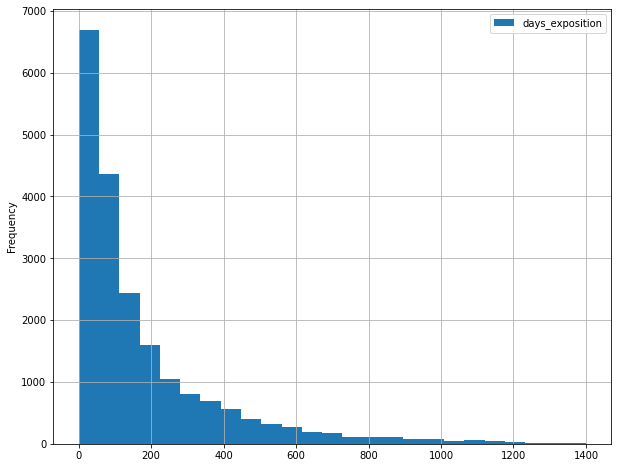

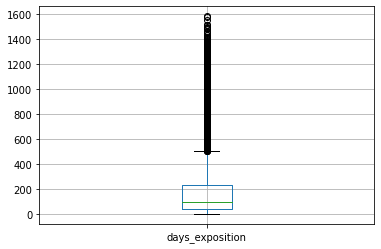

In [31]:
#Выведем характерные значения
display(data_filtred['days_exposition'].describe())
#Построим гистограмму
data_filtred.plot(kind='hist', y='days_exposition', range=(0,1400), grid=True, bins=25, figsize=(10,8))
plt.show()
#Построим диаграмму размаха
data_filtred.boxplot('days_exposition')
plt.show()

**Выводы по полученным значениям:**
- медиана 95 дней, среднее арифметическое 179 дней. Отличаются почти в 2 раза. Это можно объяснить аномально долгими продажами.
- самая быстрая продажа - 1 день, самая долгая 1580 дней.
- большая часть квартир продается в течении 6 месяцев.
- быстрой можно считать продажу в течении 30 дней.
- аномально долгая продажа - более 500 дней.

#### Изучим какие факторы больше влияют на цену.

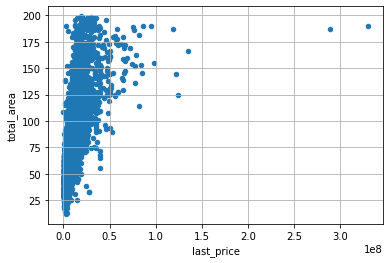

0.6587605100409731


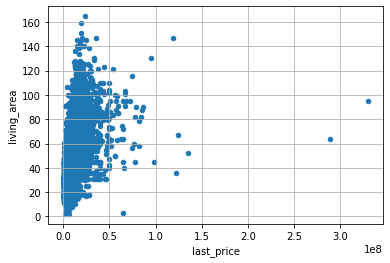

0.5292767463611272


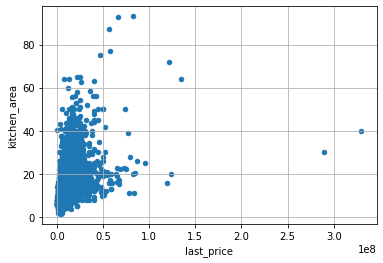

0.5187372020343044


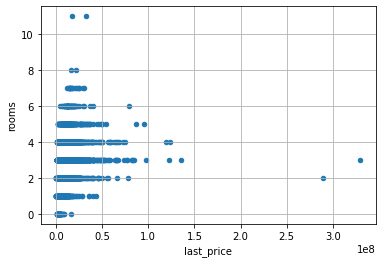

0.3805302721159458


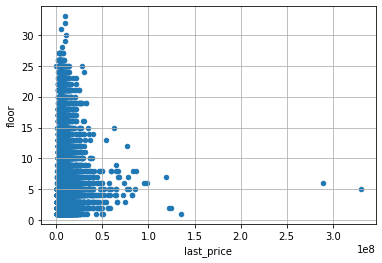

0.043299102625717095


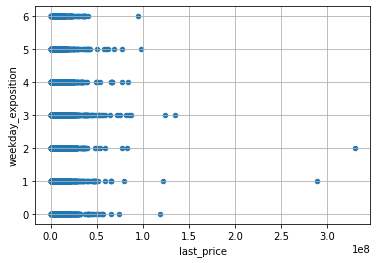

-0.013683092168088174


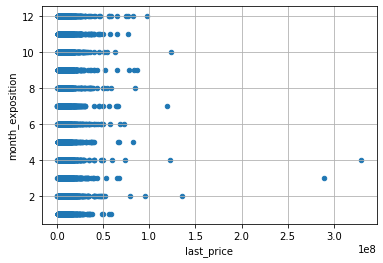

0.002348248173459733


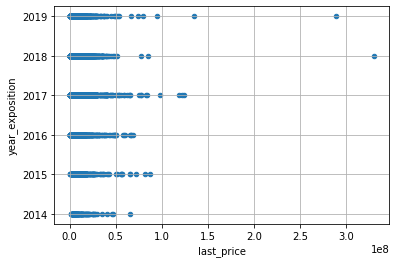

-0.03641173580253357


In [32]:
#Построим диаграмму рассеяния для зависимости цены от общей площади
data_filtred.plot(x='last_price', y='total_area', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['total_area']))

#Построим диаграмму рассеяния для зависимости цены от жилой площади
data_filtred.plot(x='last_price', y='living_area', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['living_area']))

#Построим диаграмму рассеяния для зависимости цены от площади кухни
data_filtred.plot(x='last_price', y='kitchen_area', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['kitchen_area']))

#Построим диаграмму рассеяния для зависимости цены от количества комнат
data_filtred.plot(x='last_price', y='rooms', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['rooms']))

#Построим диаграмму рассеяния для зависимости цены от этажа 
#зависимость от типа этажа мы построить не можем, это не колличественное значение
data_filtred.plot(x='last_price', y='floor', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['floor']))

#Построим диаграмму рассеяния для зависимости цены от дня недели размещения
data_filtred.plot(x='last_price', y='weekday_exposition', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['weekday_exposition']))

#Построим диаграмму рассеяния для зависимости цены от месяца размещения
data_filtred.plot(x='last_price', y='month_exposition', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['month_exposition']))

#Построим диаграмму рассеяния для зависимости цены от года размещения
data_filtred.plot(x='last_price', y='year_exposition', kind = 'scatter', grid=True)
plt.show()
#Посчитаем коэффициент корреляции
print(data_filtred['last_price'].corr(data_filtred['year_exposition']))

**Выводы по полученным значениям:**
- самая высокая, хотя и не ярко выраженная - зависимость цены от общей площади квартиры.
- немного меньшая зависимость цены от жилой площади и площади кухни.
- зависимость цены от количества комнат практически не прослеживается, сначала цена растет и достигает пика для квартир с 3-мя комнатами, но потом начинает падать, для объектов с большим количеством комнат.
- зависимость цены от этажа, дня, месяца и года размещения отсутствует.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

,count,mean
locality_name,,
Санкт-Петербург,15486,113560.087498
Пушкин,364,103122.096154
Кудрово,472,95324.476695
Парголово,326,90331.840491
Мурино,589,86073.621392
Шушары,440,78676.904545
Колпино,337,75332.866469
Гатчина,307,68745.693811
Всеволожск,396,68723.388889


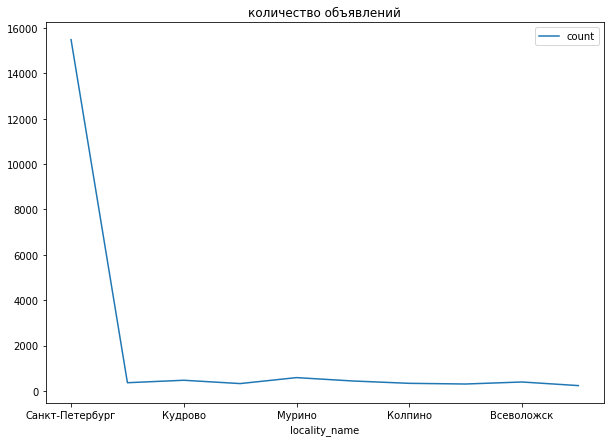

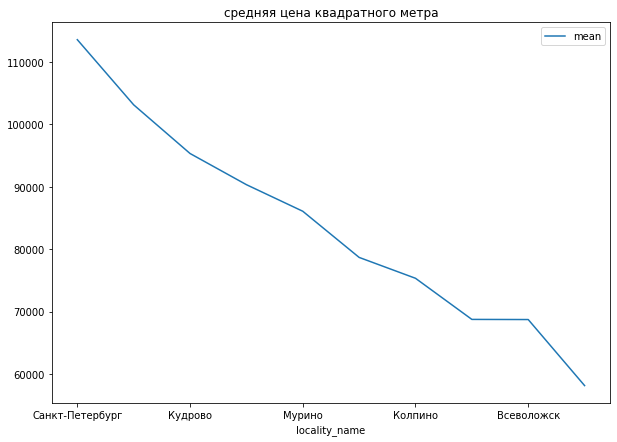

In [33]:
#Выведем 10 населенных пунктов по количеству объявлений
#Сделаем сводную таблицу с названиями населенных пунктов, ценой квадратного метра и посчитаем количество и сумму
data_locality = data_filtred.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
data_locality.columns = ['count', 'mean']
#Отсортируем таблицу по убыванию количества объявлений и оставим только первые 10 
data_locality = data_locality.sort_values('count', ascending=False).head(10)
data_locality = data_locality.sort_values('mean', ascending=False)

display(data_locality)
data_locality['count'].plot(figsize=(10,7), legend=True)
plt.title('количество объявлений')
plt.show()
data_locality['mean'].plot(figsize=(10,7), legend=True)
plt.title('средняя цена квадратного метра')
plt.show()

**Выводы по полученным значениям:**
- самая высокая стоимость квадратного метра в Санкт-Петербурге.
- самая низкая стоимость квадратного метра в Выборге.

#### Вычислим среднюю цену каждого километра в Санкт-Петербурге.

,стоимость м2
cityCenters_nearest_km,
0.0,223445.680000
1.0,165477.744318
2.0,149946.409091
3.0,120683.763158
4.0,127932.549849
5.0,137168.590542
6.0,147682.086505
7.0,154758.548780
8.0,124876.249153


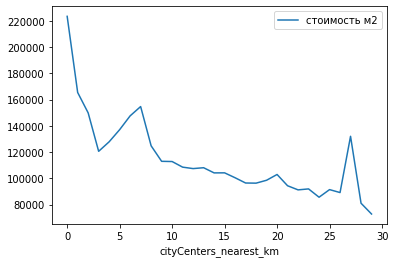

In [34]:
#Сделаем срез с квартирами только в Санкт-Петербурге
data_sp = data_filtred.query('locality_name == "Санкт-Петербург"')
#Сделаем сводную таблицу с расстоянием от центра и стоимостью м2
data_sp = data_sp.pivot_table(index='cityCenters_nearest_km', values='square_meter_price', aggfunc='mean')
data_sp.columns=['стоимость м2']
#Построим диаграмму рассеяния для зависимости цены м2 от удаленности от центра
data_sp.plot()
display(data_sp)

**Выводы по полученным значениям:**
- Видна прямая зависимоть цены от расстояния до центра, чем дальше от центра, тем ниже стоимсоть.
- На графике есть скачки средней стоимости, предполагаю, что возможно, они появились из-за квартир в кварталлах "Бизнесс класса", стоимость которых выше, чем в домах расположенных по соседству.

### Общий вывод

**Нами был проанализирован датасет с данными о продаже квартир в Санкт-Петербурге и области.**
**Мы проанализировали данные и провели предобработку данных:**
- где это возможно избавились от пропусков
- преобразованы типы данных
- устранены неявные дубликаты в названиях населенных пунктов
- устранены редкие и выбивающиеся значения

**Добавлены новые столбцы:**
- стоимость квадратного метра
- день публикации
- месяц публикации
- год публикации
- тип этажа
- округленное расстояние до центра в километрах

**Произведен исследовательский анализ данных, проанализирорваны следующие данные и по ним построены гистограммы:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры;
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Было изучено как быстро продавались квартиры,
какие факторы больше всего влияют на стоимость объекта.
Выделены 10 населённых пунктов по количеству объявлений, 
из них выделены пункты с самой высокой и низкой стоимостью квадратного метра,
вычислина средняя цена каждого километра в г. Санкт-Петербург**

***По результатам исследования выявлено: большее влияние на стоимость квартиры оказывает удаленность от центра и общая площадь квартиры. Чуть меньшее значение оказывают жилая площадь и площадь кухни. Влияние других факторов на стоимость квартиры не прослеживается.***